# Problem Statement: Parkinson's Disease Detection based on voice recordings.
### LINK: https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [4]:
df= pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Data Overview

In [5]:
print("The number of rows are:", df.shape[0],"\nThe number of columns are:", df.shape[1])

The number of rows are: 195 
The number of columns are: 24


In [6]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [7]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df['status'].value_counts(normalize=True)

status
1    0.753846
0    0.246154
Name: proportion, dtype: float64

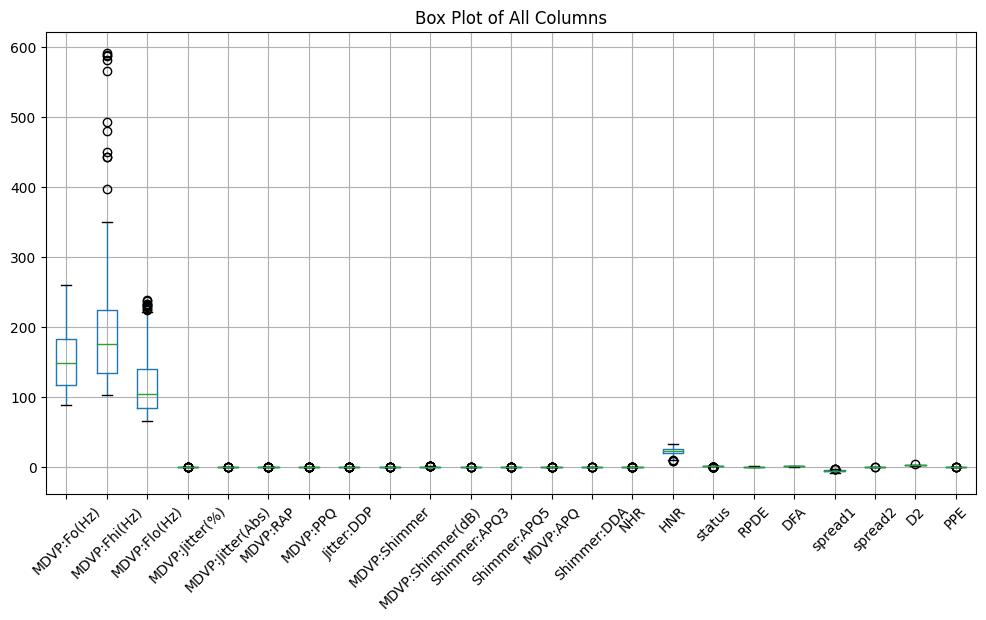

In [9]:
# Create box plots for all columns
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box Plot of All Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



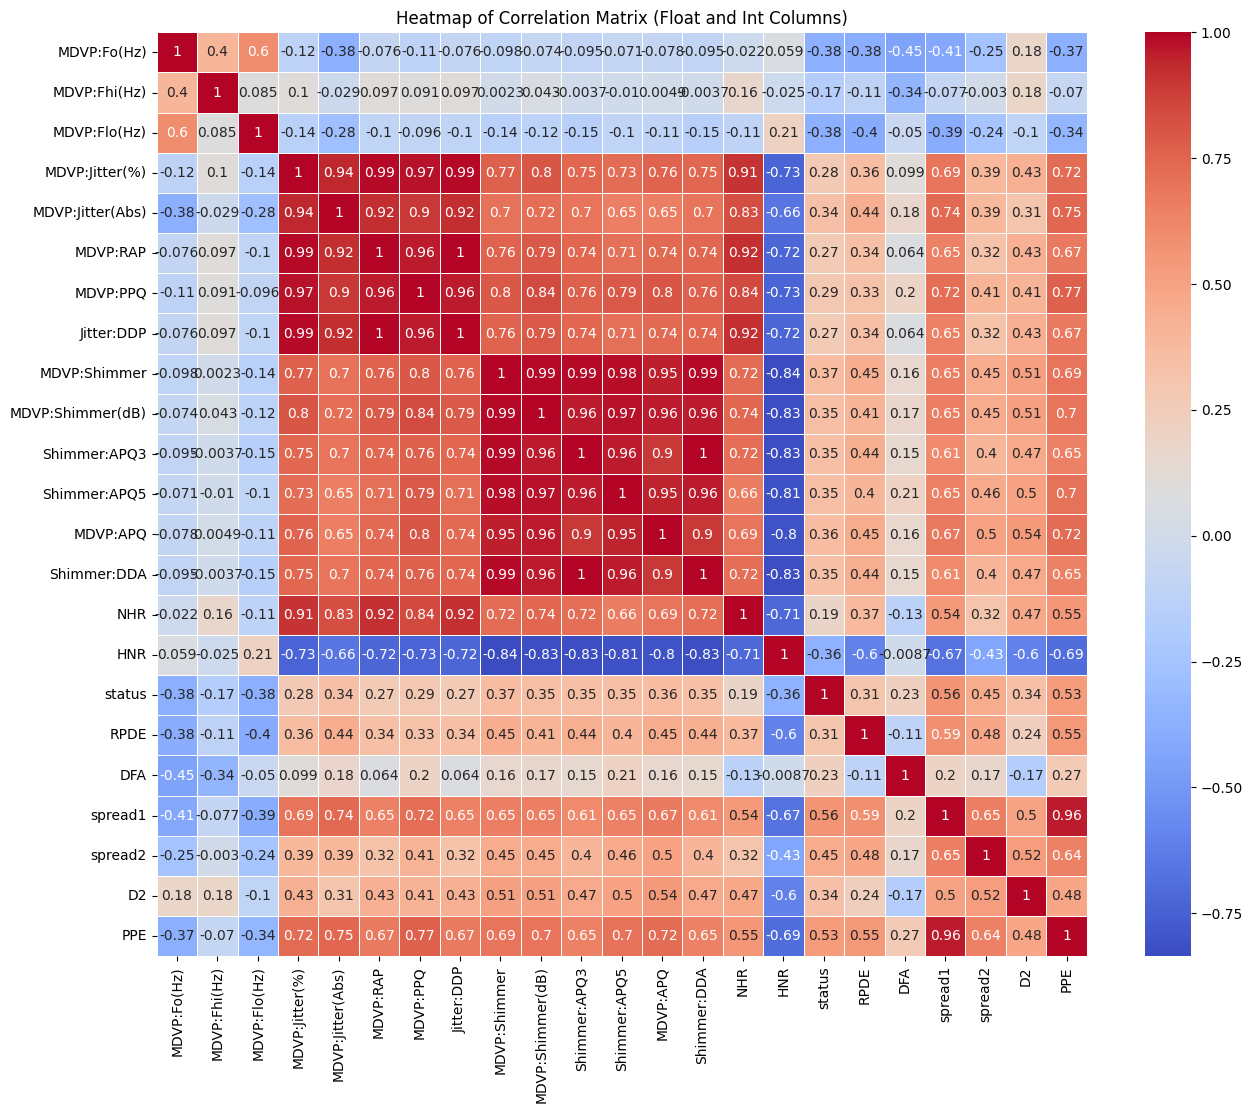

In [10]:
# Select only columns with data types 'float' and 'int'
numeric_cols = df.select_dtypes(include=['float', 'int'])

# Create a correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Float and Int Columns)')
plt.show()

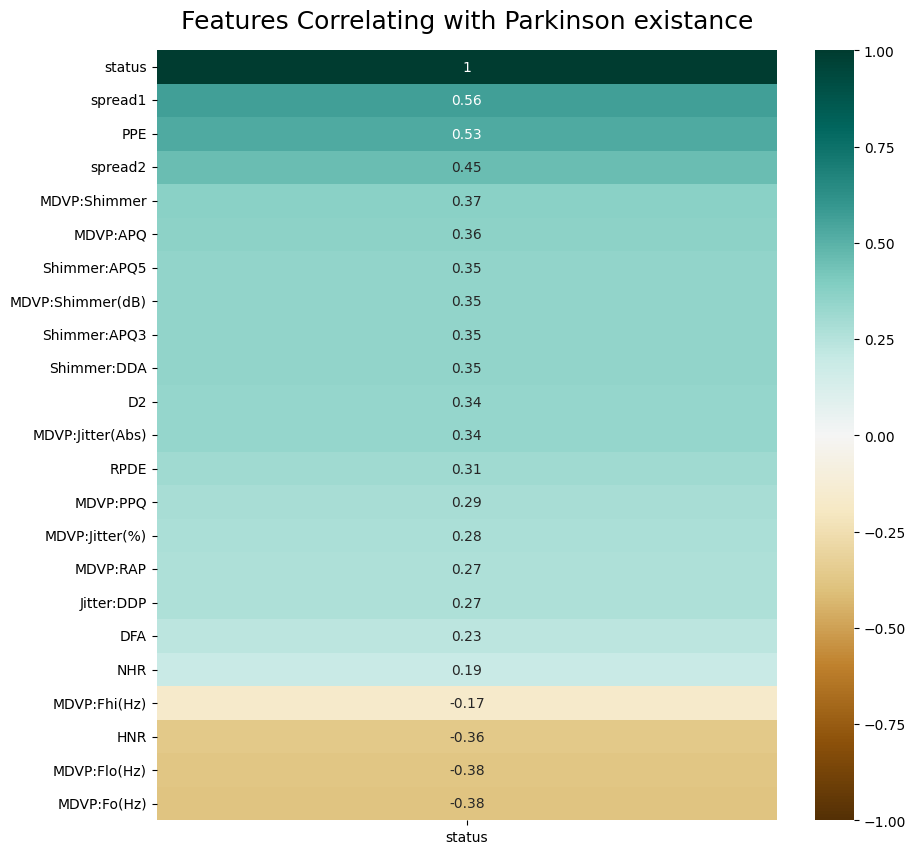

In [13]:
# modify the headmap plot to show correlation variables to the status 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(numeric_cols.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':18}, pad=16);

### Insights: 
- The dataset has 195 rows 195 and 24 columns.
- The data type of "name" is object rest features have datatype float.
- Status is the target variable, the target variable is not balanced.
- There is no missing values in the dataset.
- The column "MDVP:Fhi(Hz)"" has outliers.
- We see that spread1, PPE, spread2 have higher coorelation with the target variable there are some features with doesnot have much correlation with the target variable so they are least important.4


### Data preparation: 

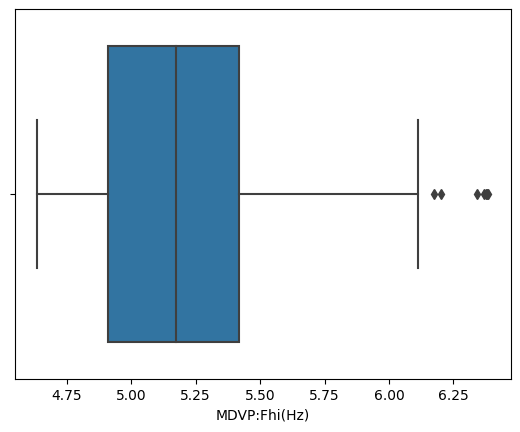

In [14]:
# Example of logarithmic transformation
df['MDVP:Fhi(Hz)'] = np.log1p(df['MDVP:Fhi(Hz)'])
sns.boxplot(x=df['MDVP:Fhi(Hz)'])
plt.show()

In [15]:
# Independent Variable
X = df.drop('status', axis=1) 
x = X.select_dtypes(include=['float', 'int'])
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,5.064505,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,5.008299,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,4.883642,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,4.933545,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,4.961312,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [16]:
#Dependent Variable
y=df['status']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [17]:
# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust sampling_strategy if needed

# Fit and apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the distribution of classes after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({1: 147, 0: 147})


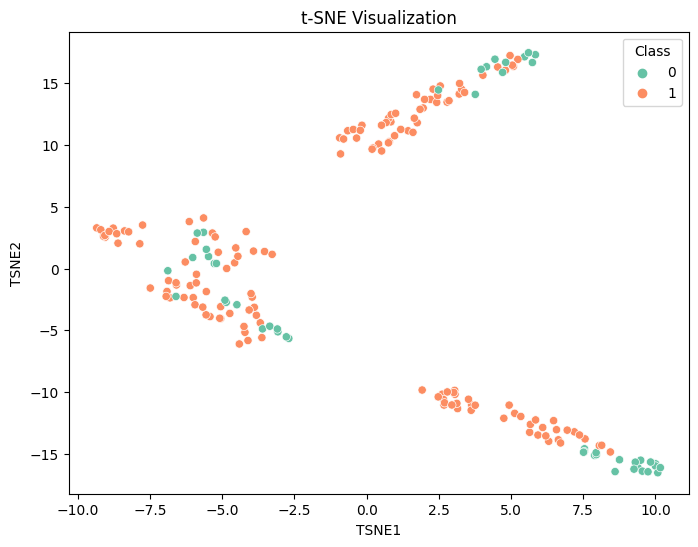

In [18]:
# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

In [19]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=11)


# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (205, 22)
y_train shape:  (205,)
X_test shape:  (89, 22)
y_test shape:  (89,)


### Insights:
- Performing logarithmic transformation on the feature 'MDVP:Fhi(Hz)' to handle the outlier.
- Seperated the independent and dependent features are X and y respectively.
- As the target variable was imbalanced so we applied SMOTE on it.
- Applied t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning technique used for dimensionality reduction and visualization of high-dimensional datasets.
- Then splitting the dataset into independent and dependent variables, and then splitting it further into training and testing sets.

### Modelling: 

### Logistic Regression

Predictions for the first ten samples:
[1 0 0 1 1 0 1 0 0 1]

Probabilities for the first ten samples:
[[0.03053161 0.96946839]
 [0.79157222 0.20842778]
 [0.6784116  0.3215884 ]
 [0.41042821 0.58957179]
 [0.05744884 0.94255116]
 [0.53341338 0.46658662]
 [0.383132   0.616868  ]
 [0.85031047 0.14968953]
 [0.90410738 0.09589262]
 [0.42088833 0.57911167]]


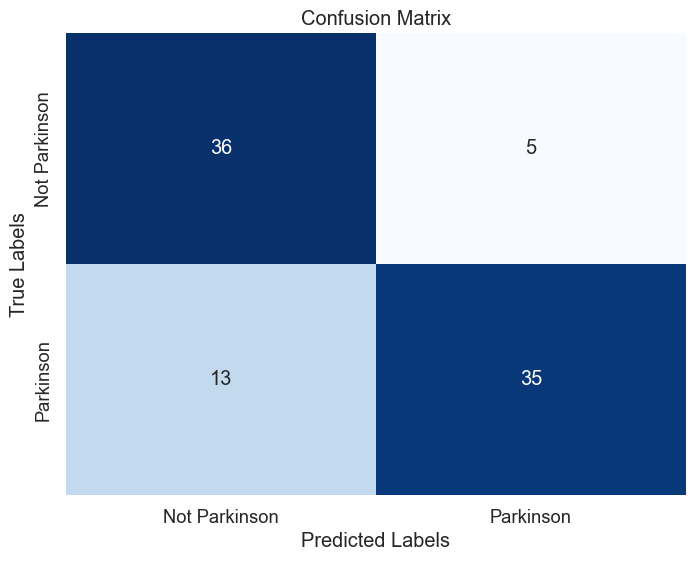


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.88      0.73      0.80        48

    accuracy                           0.80        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.81      0.80      0.80        89


Accuracy Score: 0.797752808988764


In [22]:

# Instantiate the Logistic Regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Display the first ten predictions
print("Predictions for the first ten samples:")
print(y_pred[:10])

# Get the probabilities of belonging to each class for the first ten samples
print("\nProbabilities for the first ten samples:")
print(lr.predict_proba(X_test)[:10])

# Display the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
    
    plt.show()

class_names = ["Not Parkinson", "Parkinson"]
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=class_names)

# Display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


### SVC

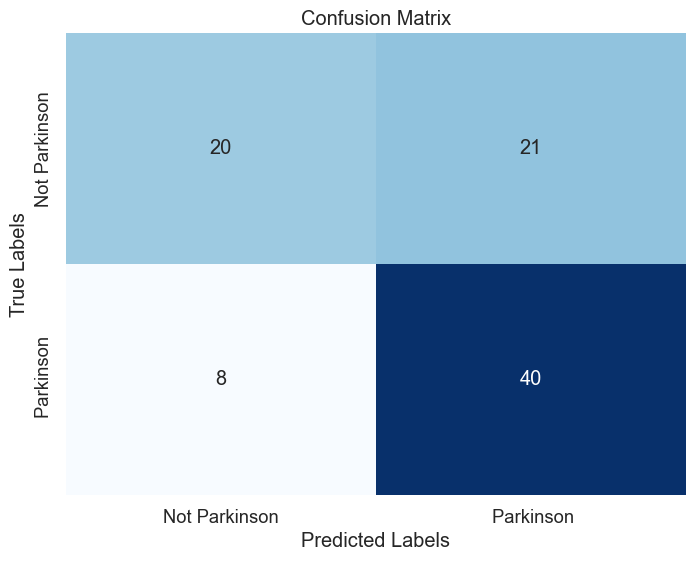

In [23]:
from sklearn.svm import SVC
# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_hat = svm.predict(X_test)

# confusion_matri
plot_confusion_matrix(confusion_matrix(y_test, y_hat),class_names=[ "Not Parkinson", " Parkinson"])

### RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf = RandomForestClassifier(random_state=123)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))  

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_


Accuracy: 95.51%
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


<Axes: >

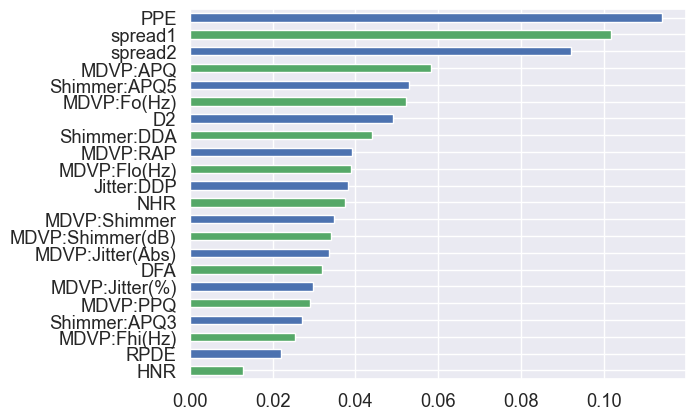

In [25]:
# plot the important features
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh',color=['g','b'])

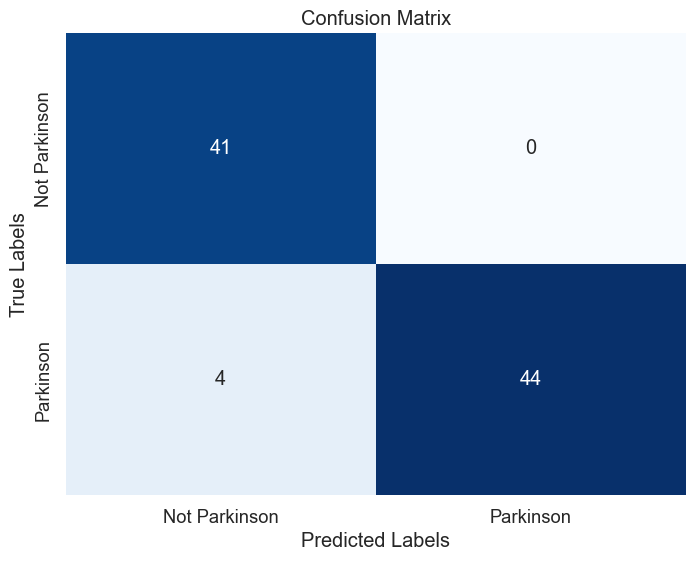


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.92      0.96        48

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89


Accuracy Score: 0.9550561797752809


In [26]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
    
    plt.show()

class_names = ["Not Parkinson", "Parkinson"]
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=class_names)

# Display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

### Insight: 
- We performed different classification models like logistic regression, svc and random forest classifer .
- Randomforest classifer has better accuracy and f1 Score.
- We check the feature importance we observe that PPE, Spread 1 Spread2 are the top 3 important features in our dataset.